#**Forest Cover Type Prediction**

This project aims to predict the forest cover type in four wilderness areas of the Roosevelt National Forest in northern Colorado. Each observation represents a 30m x 30m patch of land.

## Forest Types
- 1: Spruce/Fir
- 2: Lodgepole Pine
- 3: Ponderosa Pine
- 4: Cottonwood/Willow
- 5: Aspen
- 6: Douglas-fir
- 7: Krummholz

## Dataset
- **Training set:** 15,120 observations (features + Cover_Type)
- **Test set:** 565,892 observations (features only)

## Features
- Elevation
- Aspect
- Slope
- Horizontal Distance to Hydrology
- Vertical Distance to Hydrology
- Horizontal Distance to Roadways
- Hillshade at 9am, Noon, 3pm
- Horizontal Distance to Fire Points
- Wilderness Area (4 binary columns)
- Soil Type (40 binary columns)

## Goal
- Predict the **Cover_Type** for every row in the test set.

**Requirements**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Data Import**

In [ ]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission=pd.read_csv("sampleSubmission.csv")


In [ ]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sample_submission.head()

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,1


**EDA - Exploratory Data Analysis**

In [ ]:
df.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
df.shape

(15120, 56)

In [ ]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.isnull().sum()

,0
Id,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

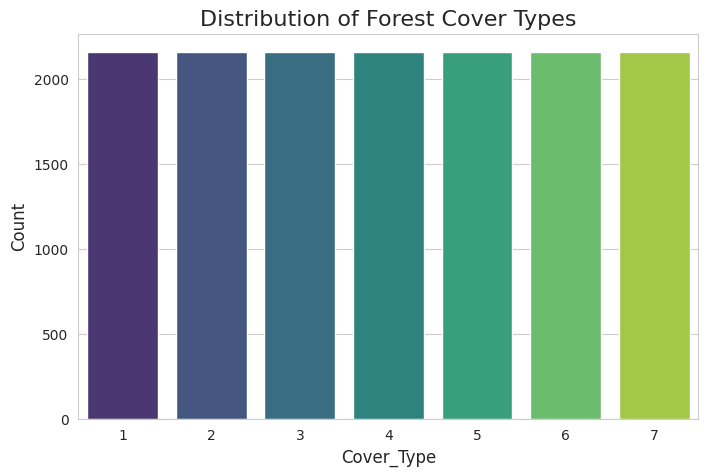

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
plt.figure(figsize=(8,5))
sns.countplot(x="Cover_Type", data=df, palette="viridis")
plt.title("Distribution of Forest Cover Types", fontsize=16)
plt.xlabel("Cover_Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

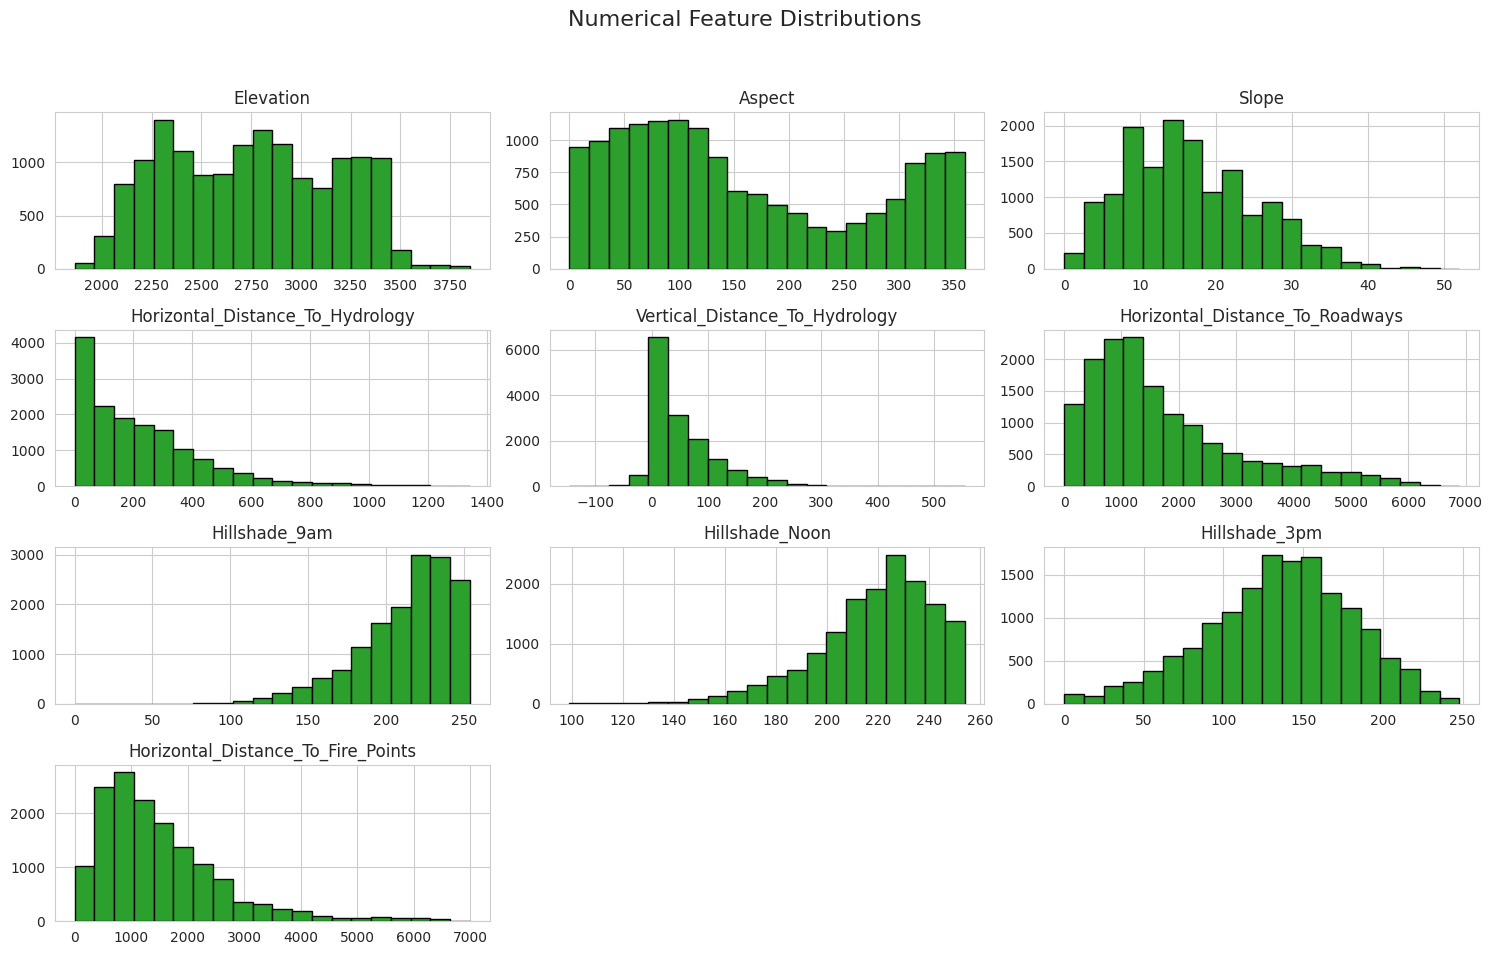

In [ ]:
numeric_cols = ["Elevation", "Aspect", "Slope",
                "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
                "Horizontal_Distance_To_Roadways", "Hillshade_9am",
                "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]

df[numeric_cols].hist(bins=20, figsize=(15,10), color="#2ca02c", edgecolor="black")
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

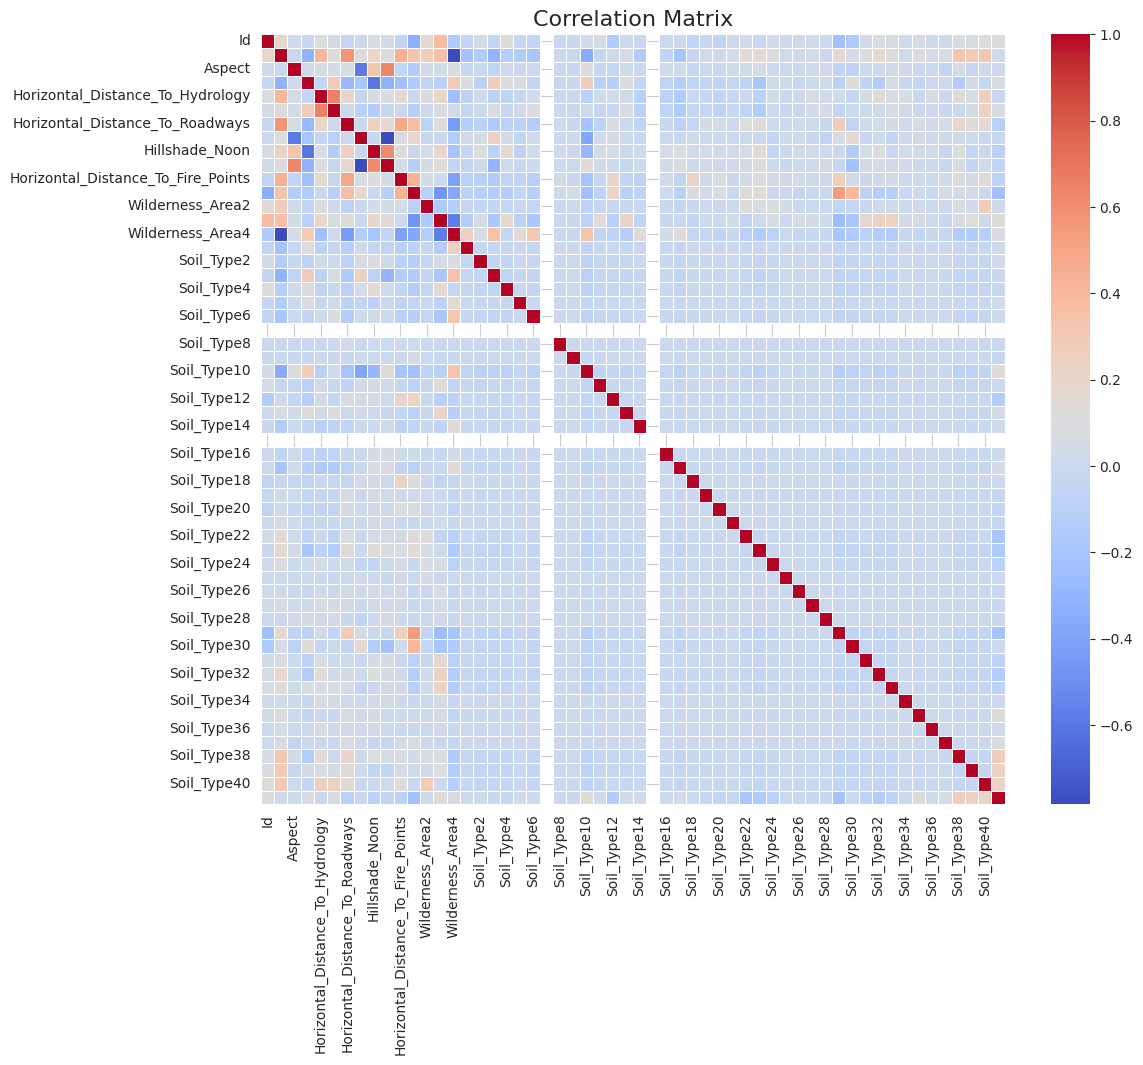

In [ ]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [ ]:
fig3 = px.scatter(df, x="Aspect", y="Slope", color="Cover_Type",
                  title="Aspect vs Slope by Cover Type",
                  color_continuous_scale=px.colors.sequential.Plasma,
                  hover_data=numeric_cols)
fig3.show()

In [ ]:
heatmap_data = df.groupby(["Hillshade_9am", "Hillshade_3pm"]).size().reset_index(name="Count")
fig4 = px.density_heatmap(heatmap_data, x="Hillshade_9am", y="Hillshade_3pm", z="Count",
                          title="Hillshade 9am vs 3pm Heatmap",
                          color_continuous_scale="Cividis")
fig4.show()

**Outlier Analysis**

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (15,10)

numeric_cols = ["Elevation", "Aspect", "Slope",
                "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
                "Horizontal_Distance_To_Roadways", "Hillshade_9am",
                "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]


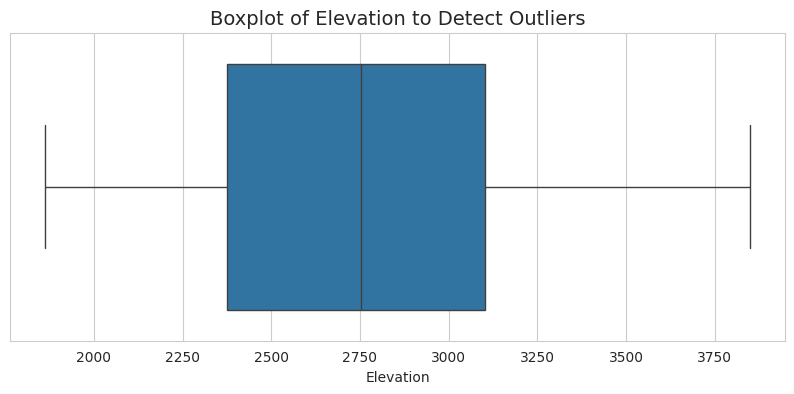

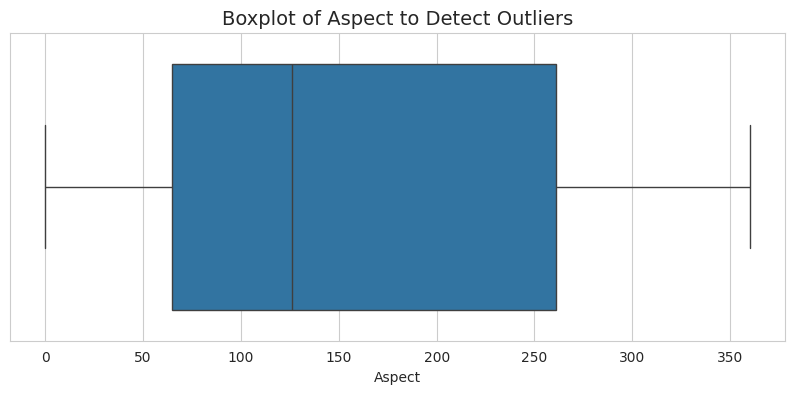

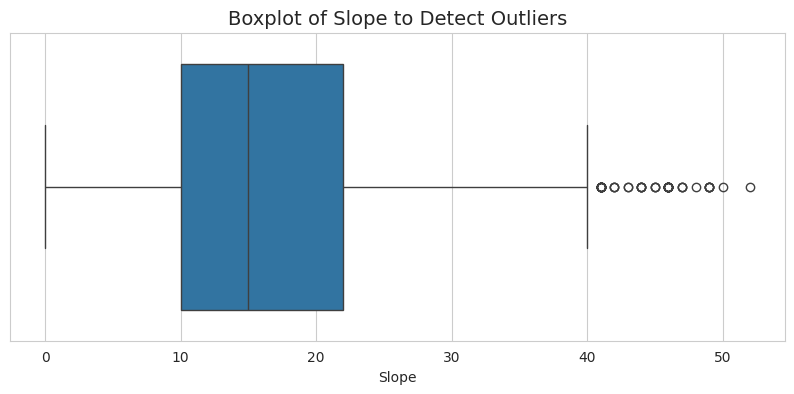

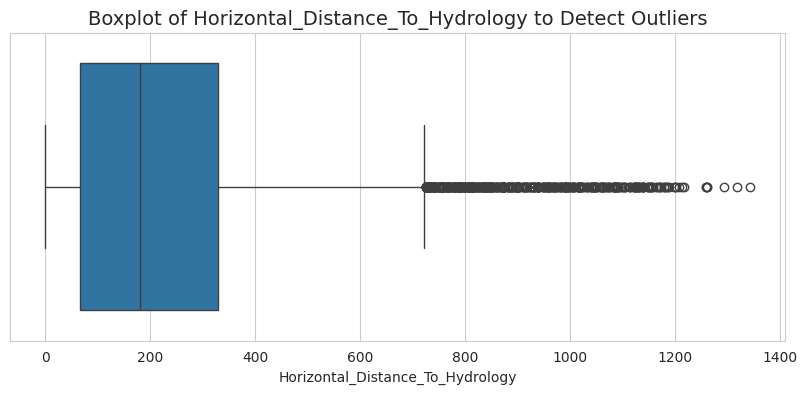

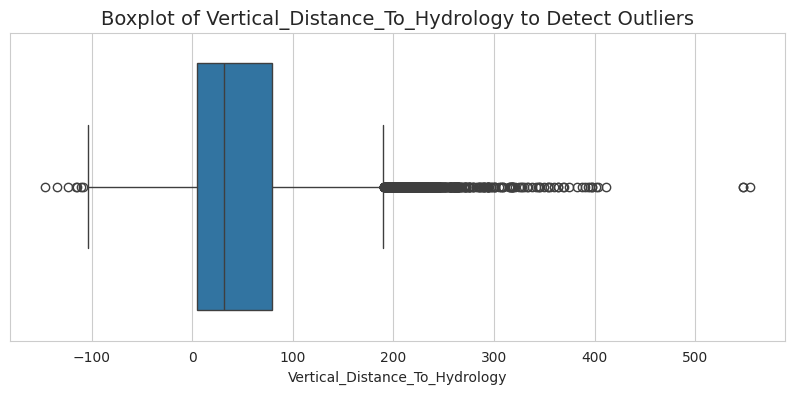

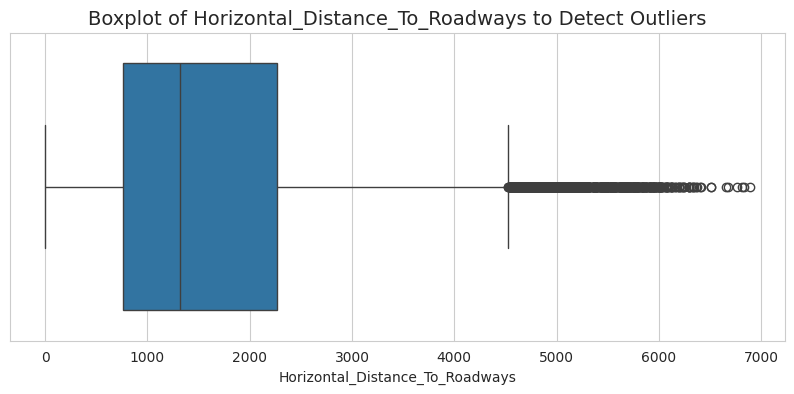

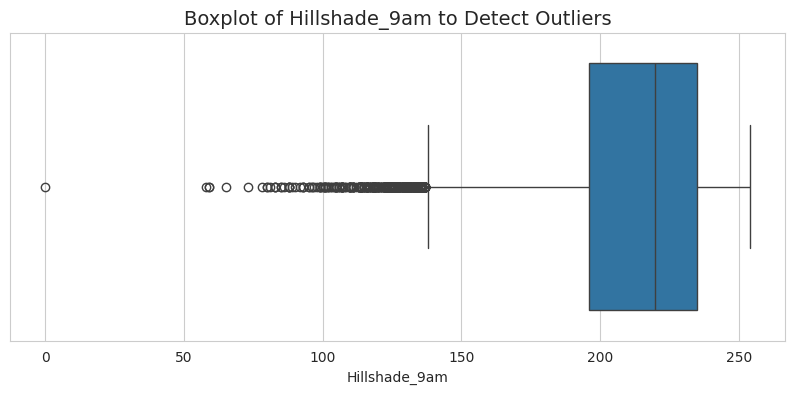

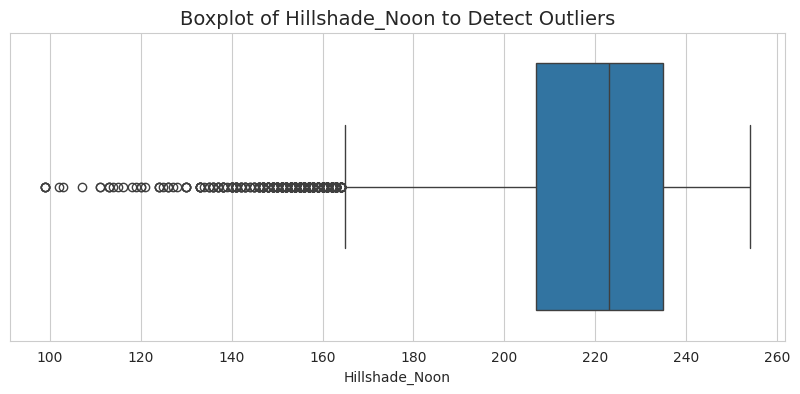

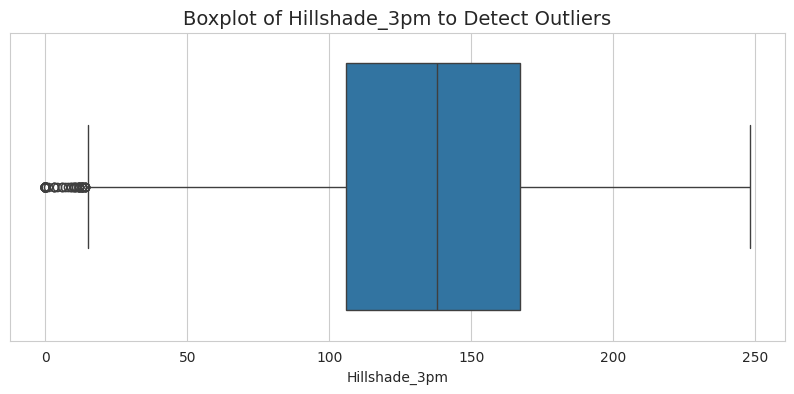

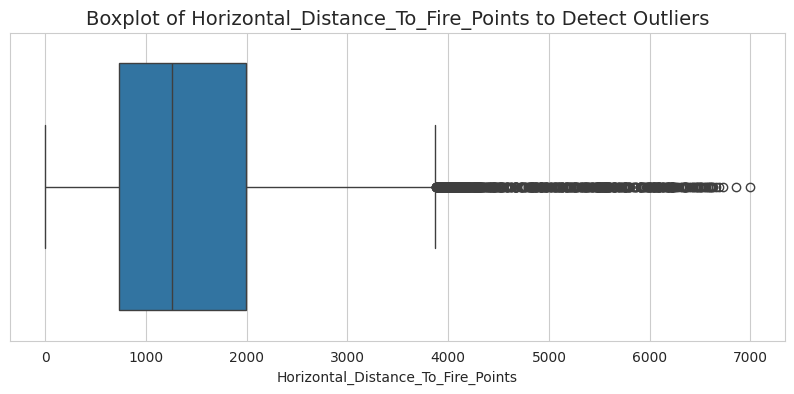

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col], color="#1f77b4")
    plt.title(f"Boxplot of {col} to Detect Outliers", fontsize=14)  # Title
    plt.xlabel(col)  # X-axis label
    plt.show()

In [ ]:
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

In [ ]:
print("Number of outliers per numeric column:\n")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")

Number of outliers per numeric column:

Elevation: 0
Aspect: 0
Slope: 57
Horizontal_Distance_To_Hydrology: 512
Vertical_Distance_To_Hydrology: 586
Horizontal_Distance_To_Roadways: 830
Hillshade_9am: 408
Hillshade_Noon: 393
Hillshade_3pm: 124
Horizontal_Distance_To_Fire_Points: 645


**Model Comparison**

In [ ]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df.drop(["Id", "Cover_Type"], axis=1)
y = df["Cover_Type"]
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}


results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results[name] = acc
    print(f"{name} Validation Accuracy: {acc:.4f}\n")

print("===== Model Comparison =====")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


Training RandomForest...
RandomForest Validation Accuracy: 0.8552

Training DecisionTree...
DecisionTree Validation Accuracy: 0.7903

Training GradientBoosting...
GradientBoosting Validation Accuracy: 0.7870

Training LogisticRegression...
LogisticRegression Validation Accuracy: 0.5542

Training KNN...
KNN Validation Accuracy: 0.8112

===== Model Comparison =====
RandomForest: 0.8552
DecisionTree: 0.7903
GradientBoosting: 0.7870
LogisticRegression: 0.5542
KNN: 0.8112


**Train RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = df.drop(["Id", "Cover_Type"], axis=1)
y = df["Cover_Type"]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_val, y_pred))

Validation Accuracy: 0.8552

Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.77      0.77       432
           2       0.78      0.65      0.71       432
           3       0.83      0.81      0.82       432
           4       0.93      0.97      0.95       432
           5       0.88      0.94      0.91       432
           6       0.83      0.88      0.85       432
           7       0.94      0.97      0.95       432

    accuracy                           0.86      3024
   macro avg       0.85      0.86      0.85      3024
weighted avg       0.85      0.86      0.85      3024



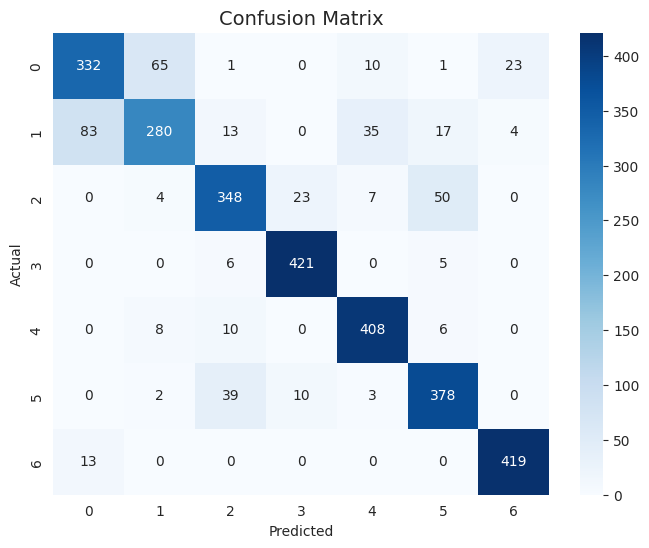

In [ ]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
rf_model.fit(X, y)
X_test = test.drop(["Id"], axis=1)
test_preds = rf_model.predict(X_test)

In [ ]:
submission = sample_submission.copy()
submission["Cover_Type"] = test_preds
submission.to_csv("submission.csv", index=False)
print("Submission file 'submission.csv' created")

Submission file 'submission.csv' created


In [ ]:
joblib.dump(rf_model, "random_forest_model.pkl")
print("RandomForest model saved as 'random_forest_model.pkl'")

RandomForest model saved as 'random_forest_model.pkl'


**Conclusion**

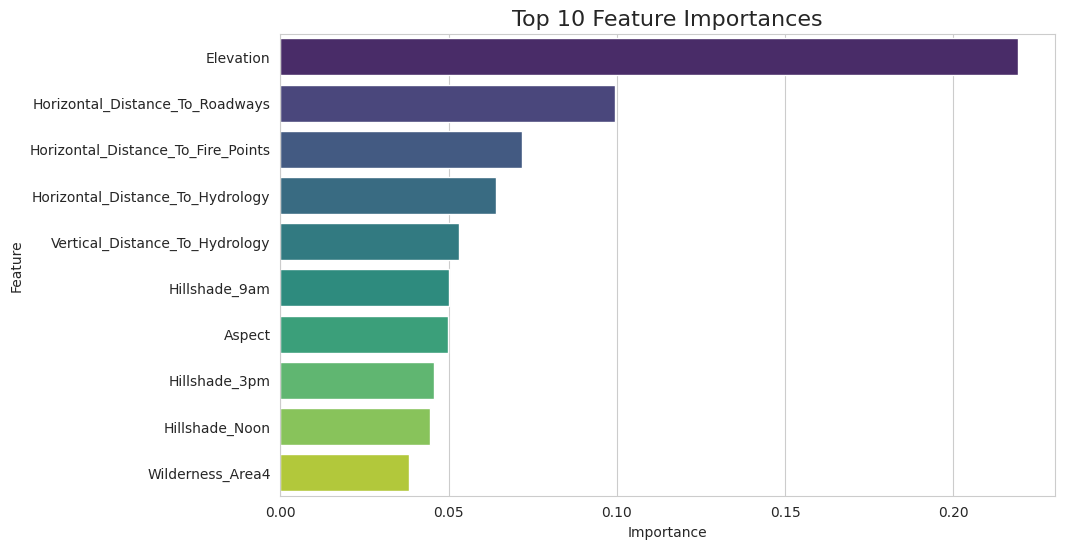

In [ ]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top10_features = feat_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(10,6))
sns.barplot(x=top10_features.values, y=top10_features.index, palette="viridis")
plt.title("Top 10 Feature Importances", fontsize=16)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Conclusion

- RandomForest achieved a strong validation accuracy (~85.5%), outperforming other models like DecisionTree, GradientBoosting, LogisticRegression, and KNN.

- Tree-based models are robust to outliers, so no outlier removal was necessary.

- Top features (e.g., Elevation, Horizontal_Distance_To_Hydrology, Hillshade_9am, Slope, etc.) are the most influential in predicting forest cover type.

- Model is ready for deployment or submission, and has been saved as 'random_forest_model.pkl'.